# ELE510 Image Processing with robot vision: LAB, Exercise  4, Spatial-domain filtering

### Daniel Fylling 

## Abstract

The exercise involves finding the 1D differentiation and smoothing filters for both Sobel and Prewitt masks, this is practiced both by hand and by coding. An example image is filtered with these masks, and corresponding gradient images are produced. It is learned that both gradients of differential masks and Laplacian filters can serve well for edge detection.

Further the exercise explores the effects of applying Gaussian and median filters for noise removal and the performance of these filters in handling different types of noise is discussed. It is found that gaussian noise is best handled by the gaussian filter and that salt and pepper noise is best handled by the median filter.

## Problem 1

In this problem we want to get a better understanding of linear filtering using convolution. 

**The computations should be done first by hand on paper (attached a picture for your solution)**. Thereafter, check the results on the notebook with the pre-built functions.

**Sobel** and **Prewitt** masks are used to compute the two components of the gradient. 
They perform differentiation over a 3 pixel region in the horizontal (x) and vertical (y) direction respectively and smooth by a 3 pixel smoothing filter in the other direction. 
The masks represent separable 2D filters and can thereby be separated in a differentiation filter and a smoothing filter.

The **Sobel masks**:
$$
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 2\; & 0\; & -2 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 2 & 1\\ 0 & 0 & 0 \\
      -1 & -2 & -1\end{bmatrix}.
\end{equation}
$$
The **Prewitt masks**:
$$
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}
$$
**a)** Find the 1D **differentiation filter** and the 1D **smoothing filter** for the Sobel and Prewitt masks. The result will be similar for the x- and y-direction. It is therefore sufficient to find the result for one of the directions, e.g. the x-direction.





<img src="./images/P1a.jpg" />


Consider the following image:
$$
\begin{equation}
    {\mathbf Im} = \begin{bmatrix} 
    0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 1 & 0 & 0\\
    0 & 1 & 0 & 1 & 1 & 0\\
    0 & 1 & 1 & 0 & 1 & 0\\
    0 & 0 & 1 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0\end{bmatrix}.
\end{equation}
$$

**b)** Filter this image using the **Prewitt** masks. Find the two output images, representing the differential along the horizontal and vertical directions.


<img src="./images/P1b.jpg" />

**c)** Filter this image using the **Sobel** masks. Find the two output images, representing the differential along the horizontal and vertical directions.


<img src="./images/P1c.jpg" />


**d)** Compute the gradient, $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$, images based on the **Prewitt** and **Sobel** masks.


<img src="./images/P1d.jpg" />

Now, computing answers using coding:

In [134]:
import cv2
from scipy import ndimage
import scipy
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [135]:
I_1 = np.float32(np.array([[0,0,0,0,0,0], 
                            [0,0,1,1,0,0], 
                            [0,1,0,1,1,0], 
                            [0,1,1,0,1,0], 
                            [0,0,1,1,0,0], 
                            [0,0,0,0,0,0]]))

I_1

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [136]:
h_Px = np.zeros(shape=(3,3))
h_Px[:,0] = 1
h_Px[:,2] = -1

h_Py = np.transpose(h_Px)

I_Px = cv2.filter2D(I_1, ddepth = -1, kernel = np.flip(h_Px), borderType=0)
I_Py = cv2.filter2D(I_1, ddepth = -1, kernel = np.flip(h_Py), borderType=0)
I_Pg = np.sqrt(np.square(I_Px)+np.square(I_Py))
print('Image filtered with Prewitt-x')
print(I_Px)
print('Image filtered with Prewitt-y')
print(I_Py)
print('Prewitt-gradient of image')
print(I_Pg)

Image filtered with Prewitt-x
[[ 0.  1.  1. -1. -1.  0.]
 [ 1.  1.  1.  0. -2. -1.]
 [ 2.  2.  0.  0. -2. -2.]
 [ 2.  2.  0.  0. -2. -2.]
 [ 1.  2.  0. -1. -1. -1.]
 [ 0.  1.  1. -1. -1.  0.]]
Image filtered with Prewitt-y
[[ 0.  1.  2.  2.  1.  0.]
 [ 1.  1.  2.  2.  2.  1.]
 [ 1.  1.  0.  0.  0.  1.]
 [-1.  0.  0.  0. -1. -1.]
 [-1. -2. -2. -2. -1. -1.]
 [ 0. -1. -2. -2. -1.  0.]]
Prewitt-gradient of image
[[0.        1.4142135 2.236068  2.236068  1.4142135 0.       ]
 [1.4142135 1.4142135 2.236068  2.        2.828427  1.4142135]
 [2.236068  2.236068  0.        0.        2.        2.236068 ]
 [2.236068  2.        0.        0.        2.236068  2.236068 ]
 [1.4142135 2.828427  2.        2.236068  1.4142135 1.4142135]
 [0.        1.4142135 2.236068  2.236068  1.4142135 0.       ]]


In [137]:
h_Sx = np.zeros(shape=(3,3))
h_Sx[:,0] = 1
h_Sx[:,2] = -1
h_Sx[1,:] = 2*h_Sx[1,:]

h_Sy = np.transpose(h_Sx)

I_Sx = cv2.filter2D(I_1, ddepth = -1, kernel = np.flip(h_Sx), borderType=0)
I_Sy = cv2.filter2D(I_1, ddepth = -1, kernel = np.flip(h_Sy), borderType=0)
I_Sg = np.sqrt(np.square(I_Sx)+np.square(I_Sy))
print('Image filtered with Sobel-x')
print(I_Sx)
print('Image filtered with Sobel-y')
print(I_Sy)
print('Sobel-gradient of image')
print(I_Sg)

Image filtered with Sobel-x
[[ 0.  1.  1. -1. -1.  0.]
 [ 1.  2.  2. -1. -3. -1.]
 [ 3.  2.  0.  1. -3. -3.]
 [ 3.  3. -1.  0. -2. -3.]
 [ 1.  3.  1. -2. -2. -1.]
 [ 0.  1.  1. -1. -1.  0.]]
Image filtered with Sobel-y
[[ 0.  1.  3.  3.  1.  0.]
 [ 1.  2.  2.  3.  3.  1.]
 [ 1.  2.  0. -1.  1.  1.]
 [-1. -1.  1.  0. -2. -1.]
 [-1. -3. -3. -2. -2. -1.]
 [ 0. -1. -3. -3. -1.  0.]]
Sobel-gradient of image
[[0.        1.4142135 3.1622777 3.1622777 1.4142135 0.       ]
 [1.4142135 2.828427  2.828427  3.1622777 4.2426405 1.4142135]
 [3.1622777 2.828427  0.        1.4142135 3.1622777 3.1622777]
 [3.1622777 3.1622777 1.4142135 0.        2.828427  3.1622777]
 [1.4142135 4.2426405 3.1622777 2.828427  2.828427  1.4142135]
 [0.        1.4142135 3.1622777 3.1622777 1.4142135 0.       ]]



**e)** How will you interpret the results with respect to edges in the test image?

1. The edges are smeared out by the orthogonal box filter effect. The box filter detects edges while they are happening in the neighboring rows for the x-filter and likewise for neighboring columns for y-filter.
2. For both Prewitt and Sobel filters the edges are represented by the output values crossing the "zero-boundary". X-filters pick up edges in x-direction and vice verca.
3. For both gradient outputs the edges are represented by the highest values and areas of little or no change will be closer to or at zero.
4. For such a small image - where the kernel is relatively big compared to the image size, these effects are quite smeared out and the edges are shifted relatively much compared to the image size. This effect would be gradually less with increasing image size - given that we keep the kernels at the same size.


## Problem 2

Given a test image with black background (gray level 0), and a white rectangle (gray level value 1), of size $8 \times 8$ pixels in the center. 
Use the notebook to create a matrix representing this image. 

Let the test image be of size $12 \times 14$. 

Use the Prewitt masks:
$\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}$

for the computation of the differentials, $\frac{\partial I}{\partial x} = I_{x}$ and $\frac{\partial I}{\partial y} = I_{y}$ respectively.


**a)** Compute and sketch the gradient of the test image using the 2-norm for the magnitude. Use $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$. Show all relevant pixel values in the magnitude gradient image. 

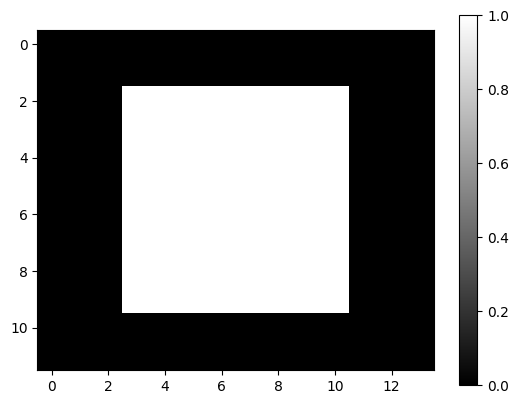

In [138]:
# Constructing test image and displaying
I = np.zeros(shape=(12,14))
I[2:10,3:11] = 1

plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

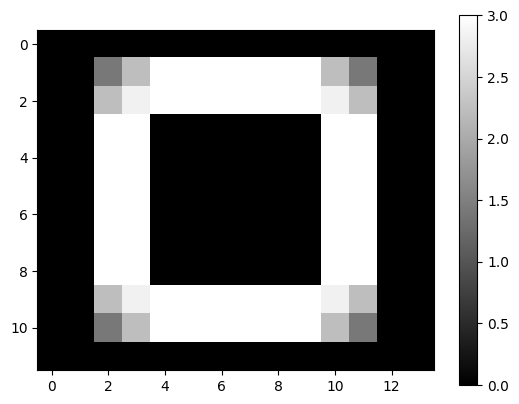

In [139]:
# Computing gradient and displaying
Ix = cv2.filter2D(I, ddepth = -1, kernel = np.flip(h_Px))
Iy = cv2.filter2D(I, ddepth = -1, kernel = np.flip(h_Py))
Ig = np.sqrt(np.square(Ix)+np.square(Iy))

plt.imshow(Ig, cmap='gray')
plt.colorbar()
plt.show()

**Observations:**
1. Compared to Problem 1 we can see that this is an even clearer example of the gradient function working well for edge detection.


**b)** Sketch the histogram of gradient directions. Be precise in labeling the height of each bar in the histogram.


In [140]:
# Finding all unique values in the graddient image.
np.unique(Ig)

array([0.        , 1.41421356, 2.23606798, 2.82842712, 3.        ])

In code below, the number of bins was adjusted to be able to separate all 5 unique values in the gradient image.

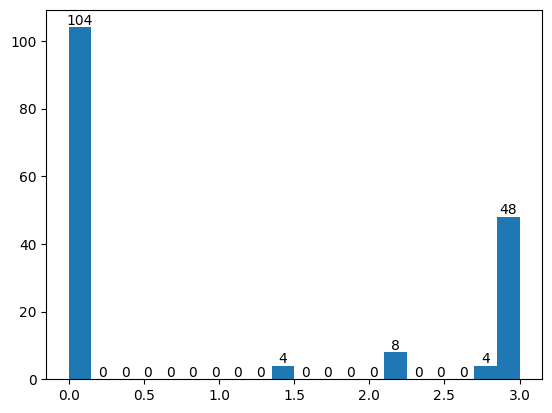

In [141]:
# Plot histogram
n, bins, patches = plt.hist(Ig.flatten() , bins = 20)

# Add labels
for i in range(len(patches)):
# Find x-position of label
    x = patches[i].get_x() + patches[i].get_width() / 2
# Find y-position of label, which is also the label itself.
    y = patches[i].get_height()
    plt.text(x, y, str(int(y)), ha='center', va='bottom')

plt.show()

**Observations:**
1. In the histogram for the gradient image we see that most cells/pixels contain the minimum value, many cells contain the maximum value and a few contain intermediate values.
    - This is a representation of the changes found in the original image. Most pixels are exactly the same as their neighbors, many have a neighbor with maximum contrast, and few have something inbetween (ideally should be zero, but nothing is perfect).



**c)** Sketch the Laplacian of the test image using the mask in previous equation. Show all relevant pixel values in the Laplacian image.

The Laplacian can be computed using the following mask:
\begin{equation}\
    {\mathbf h}_{L}=
    \begin{bmatrix} 0 & -1 & 0\\ -1 & 4 & -1\\ 0 & -1 & 0\end{bmatrix},
\end{equation}


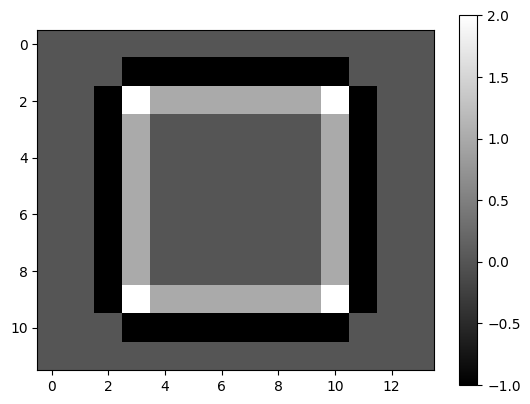

In [142]:
h_L = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

IL = cv2.filter2D(I, ddepth = -1, kernel = np.flip(h_L))

plt.imshow(IL, cmap='gray')
plt.colorbar()
plt.show()

**d)** What is the resulting mask for computation of the Laplacian if the Prewitt masks are used for computation of the differentials? 

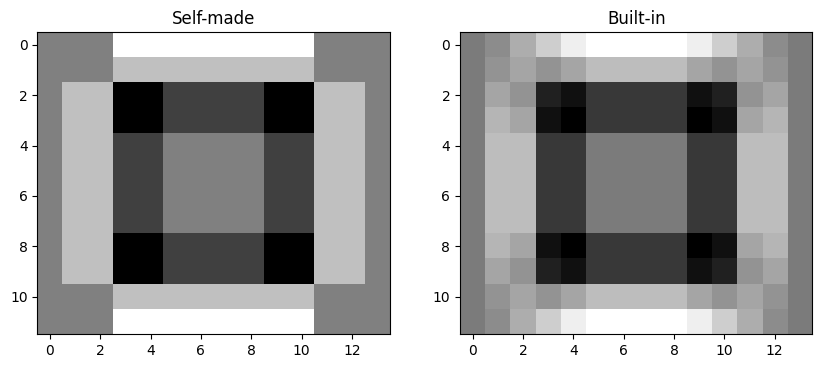

In [143]:
# Defining first derivative as Prewitt 1D mask
h_Px = np.float32(np.array([1, 0, -1]))

# Second derivative becomes first derivative convolved with itself
x1 = np.convolve(h_Px, h_Px)

# Create 2D variant of 1D filters
h_Lx = np.zeros((len(x1), len(x1)))
h_Lx[int(np.floor(len(x1)/2)),:] = x1
h_Ly = np.transpose(h_Lx)

# Approximation of Laplacian is sum of x- and y- filters
h_L2 = h_Lx + h_Ly

# Applying self made Laplacian to image 
I_L2 = cv2.filter2D(I, ddepth = -1, kernel = np.flip(h_L2))

# Generating image based on built in function
I_L3 = cv2.Laplacian(I, -1, ksize=5)

# Plotting result
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(I_L2, cmap='gray')
plt.title('Self-made')
plt.subplot(222)
plt.imshow(I_L3, cmap='gray')
plt.title('Built-in')
plt.show()


*I'm honestly not sure if this is even what the Problem is asking. But I will comment on the result anyway.*

**Observations:**
1. There is a clear difference in granularity between the self made and built in Laplacian filters.
    - Maybe this is just the limit of this methoid of estimating the Laplacian, if not I have made a mistake.
2. Depending on the usage the self made version may be just as useful as the built in function. The granularity displayed here may not be perceivable in a high resolution application. The main goal of edge detection seems to be preserved.


## Problem 3

One of the most common linear filters in computer vision applications is the Gaussian smoothing filter. 

In this problem we want to study the use of Gaussian filters with different standard deviations, $\sigma$, and different sizes, $K \times K$, where $K$ is odd ($K = 2k+1$, $k$ is integer). 
The filter kernel (mask) is found by using the OpenCV function `cv2.getGaussianKernel()` ([Documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))). 
Start by finding filter masks as follows

**a)** **h05**: $\sigma = 0.5$, $K = 7$

**b)** **h1**: $\sigma = 1$, $K = 11$

**c)** **h15**: $\sigma = 1.5$, $K = 15$

In [144]:
h05_7 = cv2.getGaussianKernel(7, 0.5)
h1_11 = cv2.getGaussianKernel(11, 1)
h15_15 = cv2.getGaussianKernel(15, 1.5)

Use the `plt.stem` function from Matplotlib and display each filter (sampled 1D Gaussian function). 

If the size $K$ is too small we will get a truncated Gaussian with a step at the tails. 

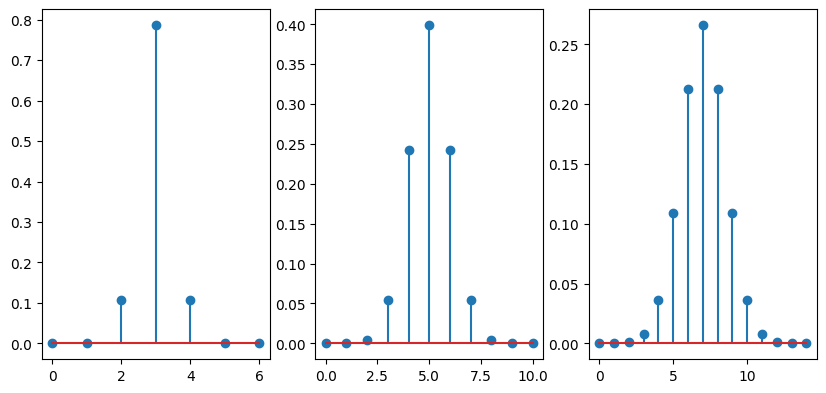

In [145]:

plt.figure(figsize=(10,10))
plt.subplot(231)
plt.stem(h05_7)
plt.subplot(232)
plt.stem(h1_11)
plt.subplot(233)
plt.stem(h15_15)
plt.show()

**d)** Show the result for c) above when $K = 7$.

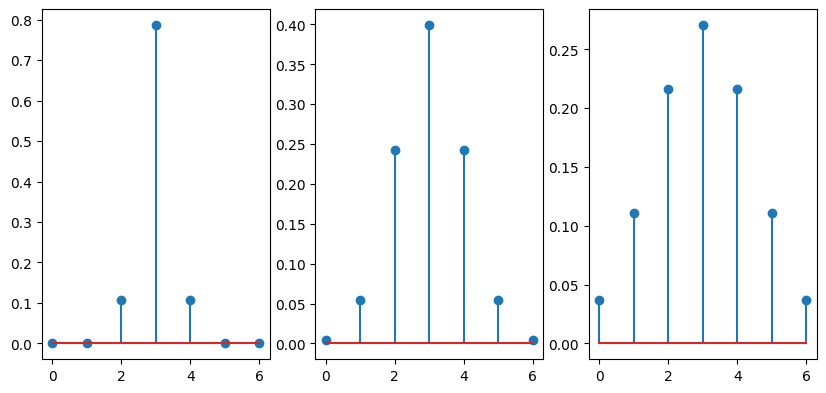

In [146]:
# Generating new Kernels
h1_7 = cv2.getGaussianKernel(7, 1)
h15_7 = cv2.getGaussianKernel(7, 1.5)

# Creating stem plots for new kernels
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.stem(h05_7)
plt.subplot(232)
plt.stem(h1_7)
plt.subplot(233)
plt.stem(h15_7)
plt.show()

**Observations:**
1. When K is chosen too small compared to the standard deviation, there will be a step at each end of the kernel.


## Problem 4

In this exercise we want to study how two well-known filters perform on noise removal, namely the Gaussian and the median filter. 



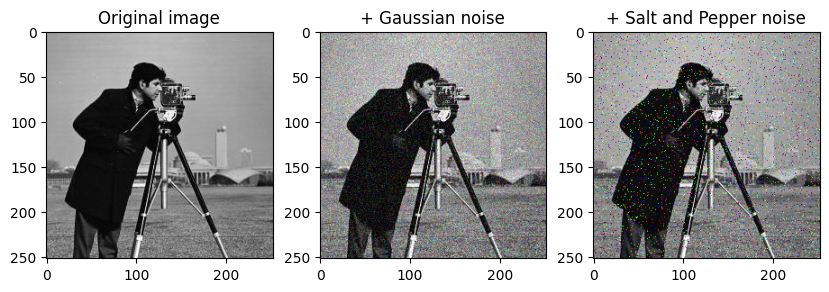

In [147]:
# Import image
Im = cv2.imread('./images/cameraman.jpg')

# Apply different noise to image

# Gaussian white noise with variance of 0.01 
Im_gauss = random_noise(Im,  mode='gaussian', mean=0, var=0.01) 

# Salt and pepper noise on 5% of the pixels
Im_SP = random_noise(Im, 's&p', amount=0.05) 

# PLot images for comparison
plt.figure(figsize=(10,10))
plt.subplot(331)
plt.title(f'Original image')
plt.imshow(Im, cmap='gray')

plt.subplot(332)
plt.title(f'+ Gaussian noise')
plt.imshow(Im_gauss, cmap='gray')

plt.subplot(333)
plt.title(f'+ Salt and Pepper noise')
plt.imshow(Im_SP, cmap='gray')

plt.show()

**a)** Apply Gaussian smoothing to the original image, `Im`,  using the defined filter kernels from problems 3a, 3b, and 3c. Explain the results.

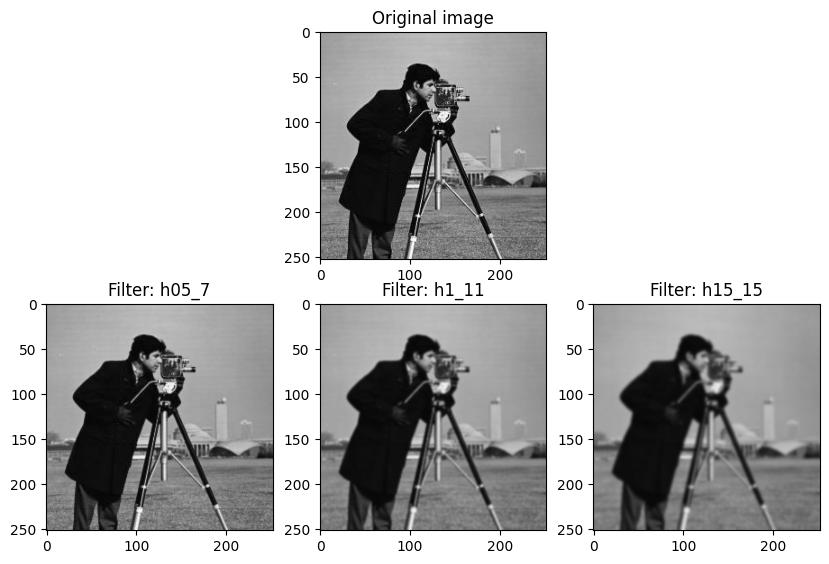

In [153]:
# Make dictionary of kernels
kernels = {'h05_7': h05_7, 'h1_11': h1_11, 'h15_15': h15_15}

# Define plotting figure
plt.figure(figsize=(10,10))

# Plot unfiltered image for comparison
plt.subplot(3, 3, 2)
plt.title(f'Original image')
plt.imshow(Im, cmap='gray')

# Make small loop to iterate through to filter and plot images
for i, kernel in enumerate(kernels.items()):
    plt.subplot(3, 3, i+4)
    plt.title(f'Filter: {kernel[0]}')
    I_filtered = cv2.filter2D(Im, ddepth = -1, kernel = np.flip(kernel[1]))
    I_filtered = cv2.filter2D(I_filtered, ddepth = -1,\
                               kernel = np.flip(np.transpose(kernel[1])))
    plt.imshow(I_filtered, cmap='gray')
    
plt.show()

**Observations:**
1. Not specifically stated, but I chose to apply smoothing filter in both x- and y-directions.
2. Higher standard deviation, sigma, causes higher degree of smoothing.

Gaussian noise:

**b)** Apply the three Gaussian filters, described in problems 3a, 3b, and 3c, to the image `Im_gauss`. Explain the results.

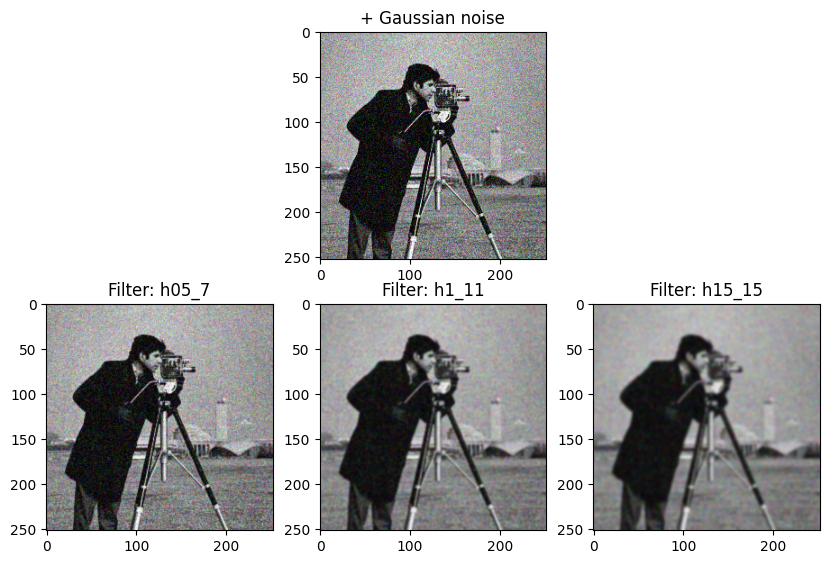

In [149]:
# Repeat same process as for original image for the image with gaussian noise
plt.figure(figsize=(10,10))

plt.subplot(3, 3, 2)
plt.title(f'+ Gaussian noise')
plt.imshow(Im_gauss, cmap='gray')

for i, kernel in enumerate(kernels.items()):
    plt.subplot(3, 3, i+4)
    plt.title(f'Filter: {kernel[0]}')
    I_filtered = cv2.filter2D(Im_gauss, ddepth = -1,\
                               kernel = np.flip(kernel[1]))
    I_filtered = cv2.filter2D(I_filtered, ddepth = -1,\
                               kernel = np.flip(np.transpose(kernel[1])))
    plt.imshow(I_filtered, cmap='gray')
    
plt.show()

**Observations:**
1. Gaussian filter helps smooth out the gaussian noise, at the expence of clarity in high detail areas.

**c)** Apply a median filter on the image `Im_gauss` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?

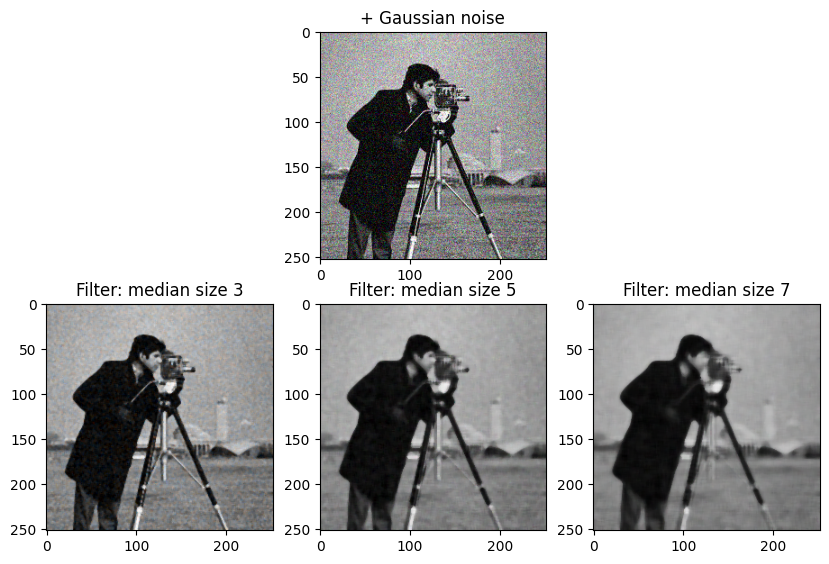

In [150]:
# Repeat similar process for median filter
plt.figure(figsize=(10,10))

plt.subplot(3, 3, 2)
plt.title(f'+ Gaussian noise')
plt.imshow(Im_gauss, cmap='gray')

for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.title(f'Filter: median size {2*i+3}')
    I_filtered = ndimage.median_filter(Im_gauss, 2*i+3)
    plt.imshow(I_filtered, cmap='gray')
    
plt.show()

**Observations:**
1. Median filter seems to do little in terms of improving image quality with gaussian noise. Image is just less clear.
    - The random nature of gaussian noise is not well countered by the "ordered" approach of the median filter.


Salt & pepper noise:

**d)** Apply the three Gaussian filters, described in problems 3a, 3b, and 3c, to the image `Im_SP`. Explain the results.

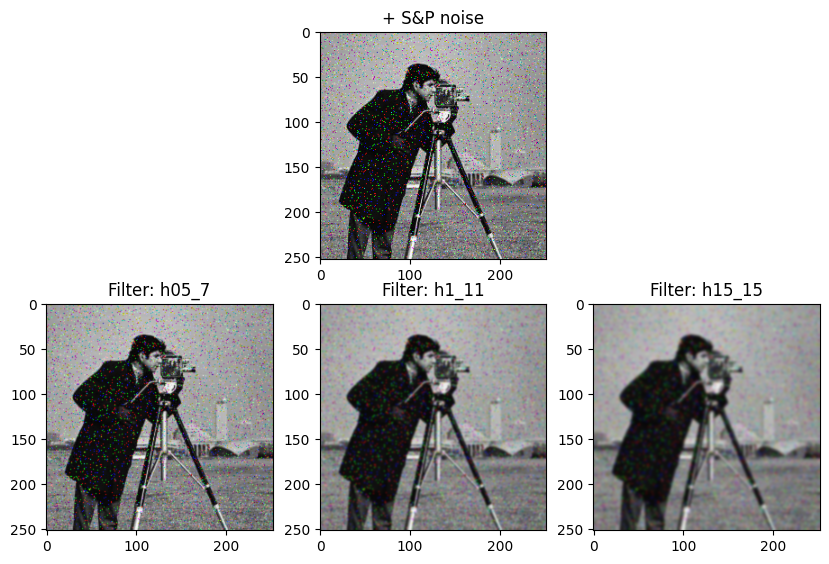

In [151]:
plt.figure(figsize=(10,10))

plt.subplot(3, 3, 2)
plt.title(f'+ S&P noise')
plt.imshow(Im_SP, cmap='gray')

for i, kernel in enumerate(kernels.items()):
    plt.subplot(3, 3, i+4)
    plt.title(f'Filter: {kernel[0]}')
    I_filtered = cv2.filter2D(Im_SP, ddepth = -1,\
                               kernel = np.flip(kernel[1]))
    I_filtered = cv2.filter2D(I_filtered, ddepth = -1,\
                               kernel = np.flip(np.transpose(kernel[1])))
    plt.imshow(I_filtered, cmap='gray')
    
plt.show()

**Observations:**
1. Gaussian filter seems to handle S&P noise particularly poorly.
    - Since this filter is performing a sort of averaging across the kernel it will be sensitive to the extreme values generated from this type of noise. 

**e)** Apply a median filter on the image `Im_SP` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?

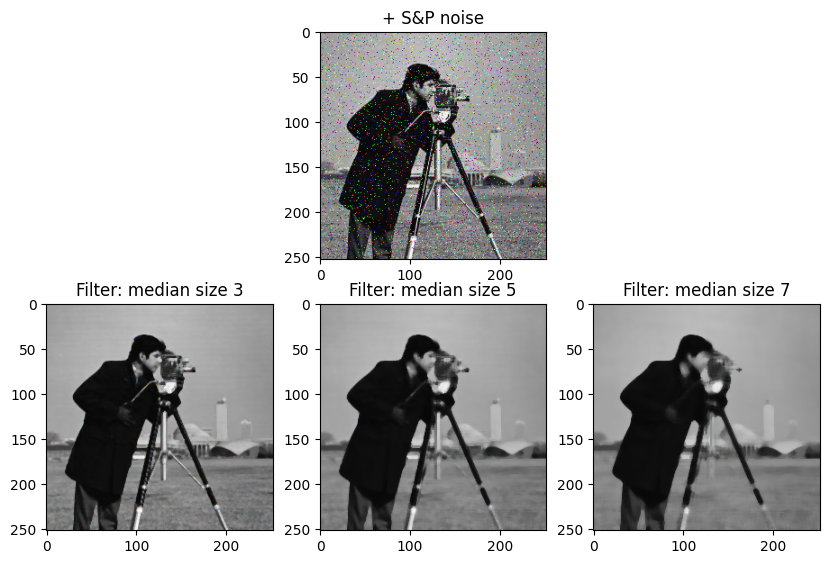

In [152]:
plt.figure(figsize=(10,10))

plt.subplot(3, 3, 2)
plt.title(f'+ S&P noise')
plt.imshow(Im_SP, cmap='gray')

for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.title(f'Filter: median size {2*i+3}')
    I_filtered = ndimage.median_filter(Im_SP, 2*i+3)
    plt.imshow(I_filtered, cmap='gray')
    
plt.show()

**Observations:**
1. Median filter performs particularly well in handling S&P noise.
    - The extreme values combined with the sparsity of affected pixels makes it so that the S&P noise will have minimal influence compared to applying median filter to the original image.



### Delivery (dead line) on CANVAS: 29.09.2023 at 23.59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.
